## Predictive Model – Boosting Algorithms:

In this blog, we will try to learn Boosting algorithms and its python implementation


To understand the implementation cycle, please see the following blog:
#### https://datasciencewithabhi.blogspot.com/2020/03/life-cycle-of-machine-learningml-project.html

** Please note that as part of this blog, we are not going for data collection or model deployment as part of implementation. Data is already available. In later blogs, we will cover some of the model selection techniques, deployment etc., as separate topics. Each of the areas like EDA, model selection, parameter hyper tuning etc. is vast and has many ways to do it. As part of different blogs, we will cover the different methods in each of the above mentioned area. Goal is to get the idea of model/intuition and implementation first and then more exploration in each of the topic can be done later. 


## Boosting Algorithms : 


Before we move to Boosting , lets have a brief overview on __Ensemble Learning Technique__. In all the techniques which we have talked about in previous blogs , we have used only one algorithm to predict . However __Ensemble Learning Technique__ use same algorithm multiple times or a group of different algorithms together to improve the prediction of model. There are 3 types of  Ensemble techniques :

1. Bagging 
2. Boosting
3. Stacking 

A brief on the above techniques is given below :
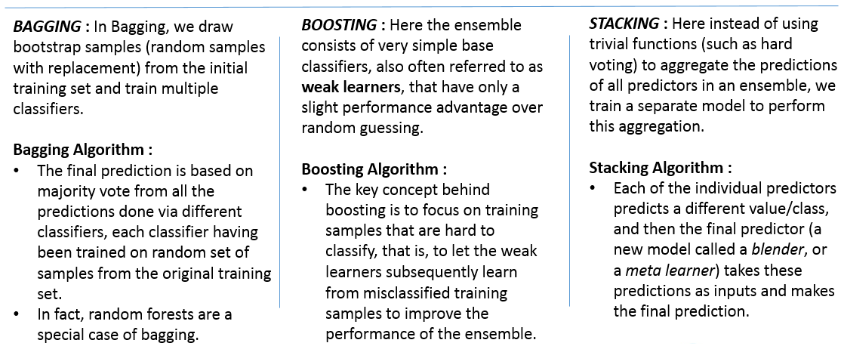

This blog we will focus on Boosting only.

## Boosting

Boosting is an ensemble approach(meaning it involves several trees) that starts from a weaker decision and keeps on building the models such that the final prediction is the weighted sum of all the weaker decision-makers.
The weights are assigned based on the performance of an individual tree.

Ensemble parameters are calculated in **stagewise way** which means that while calculating the subsequent weight, the learning from the previous tree is considered as well.

A diagram to show Boosting :
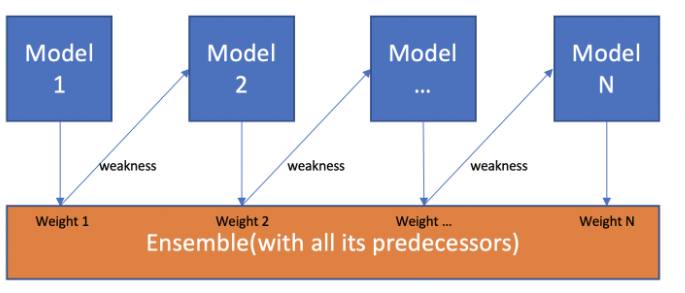


Data Assumptions for Boosting Algorithms will be same as that of underlying classifier that has been used in the algorithm.

#### Pro's
- computational scalability,
- handles missing values,
- robust to outliers,
- does not require feature scaling,
- can deal with irrelevant inputs,
- interpretable (if small),
- handles mixed predictors as well (quantitive and qualitative)

#### Con's
- inability to extract a linear combination of features
- high variance leading to a small computational power

In this blog , we will focus on  3 different type of Boosting Techniques :
1. __Adaboost__ ( Adaptive Boosting Technique)
2. __Gradient Boosting__
3. __XGBOOST (Xtreme Gradient Boosting)__

### Adaboost (Adaptive Boosting)


The first practical boosting algorithm invented by Freund and Schapire (1995). It is based on Vapnik and Chervonekis’ idea that for a trained classifier to be effective and accurate in its predictions, it should meet these three conditions:

1. classifier should be trained on “enough” training examples
    
2. it should provide a good fit to these examples by producing low training error
    
3. it should be simple

AdaBoost (Adaptive Boosting) is a very popular boosting technique that aims at combining multiple weak classifiers to build one strong classifier.

A single classifier may not be able to accurately predict the class of an object, but when we group multiple weak classifiers with each one progressively learning from the others' wrongly classified objects, we can build one such strong model. The classifier mentioned here could be any of your basic classifiers, from Decision Trees (often the default) to Logistic Regression, etc.

Now we may ask, **what is a "weak" classifier?** A weak classifier is one that performs better than random guessing, but still performs poorly at designating classes to objects. For example, a weak classifier may predict that everyone above the age of 40 could not run a marathon but people falling below that age could. Now, you might get above 60% accuracy, but you would still be misclassifying a lot of data points!

Rather than being a model in itself, AdaBoost can be applied on top of any classifier to learn from its shortcomings and propose a more accurate model. It is usually called the **“best out-of-the-box classifier”** for this reason.

Let's try to understand how AdaBoost works with Decision Stumps. __Decision Stumps__ are like trees in a Random Forest, but not "fully grown." They have one node and two leaves. AdaBoost uses a forest of such stumps rather than trees.

Stumps alone are not a good way to make decisions. A full-grown tree combines the decisions from all variables to predict the target value. A stump, on the other hand, can only use one variable to make a decision. 

Let's see a pictorial view of stump:
Below diagram is based on the data having 3 independent variable (age , eats a lot of junk ?, Exercises in the morning ? ) and a dependent variable i.e. fit or not-fit ?
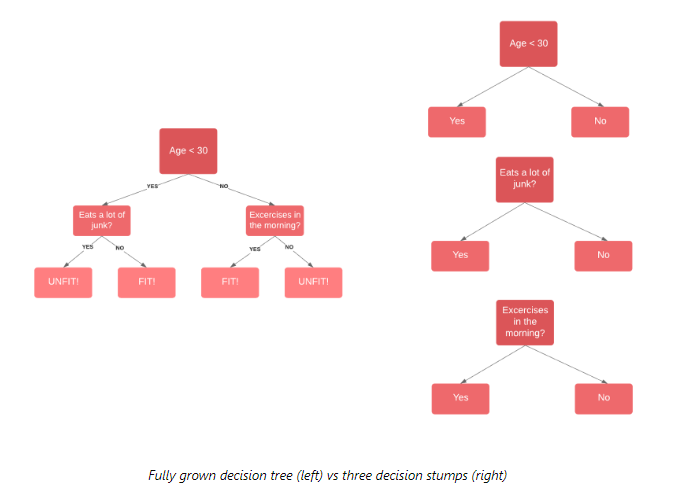

The steps to implement the Ada Boost algorithm using the decision trees are as follows:

**Algorithm**:

Assume that the number of training samples is denoted by $N$, and the number of iterations (created trees) is $M$. Notice that possible class outputs are $Y=\{-1,1\}$

1. Initialize the observation weights  $w_i=\frac{1}{N}$ where $i = 1,2, \dots, N$ for all the samples.
2. For $m=1$ to $M$:
    - fit a classifier $G_m(x)$ to the training data using weights $w_i$,
    - compute $err_m (Total  error) = \frac{\sum_{i=1}^{N} w_i I (y_i \neq G_m(x))}{\sum_{i=1}^{N}w_i}$,
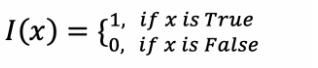
    - compute $\alpha_m = \frac {1}{2} \log (\frac{(1-err_m)}{err_m})$. This is the contribution of that tree to the final result.
    - calculate the new weights using the formula:
    
    $w_i \leftarrow w_i \cdot \exp [\alpha_m \cdot I (y_i \neq G_m(x)]$, where $i = 1,2, \dots, N$
- Normalize the new sample  weights so that their sum is 1.
- Construct the next tree using the new weights


 3. At the end, compare the summation of results from all the trees and the final result is either the one with the highest sum(for regression) or it is the class which has the most weighted voted average(for classification).

       Output $G_m(x) = argmax [\sum_{m=1}^{M} \alpha_m G_m(x)]$ (Regression)

       Output $G_m(x) = sigm [\sum_{m=1}^{M} \alpha_m G_m(x)]$ (Classification)

Alpha is how much influence this stump will have in the final classification. Total Error is nothing but the total number of misclassifications for that training set divided by the training set size. We can plot a graph for Alpha by plugging in various values of Total Error ranging from 0 to 1.

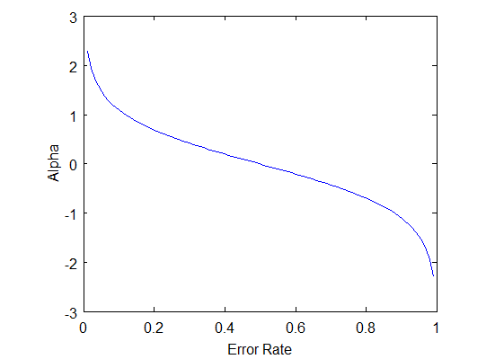

If the stump just classifies half correctly and half incorrectly (an error rate of 0.5, no better than random guessing!) then the alpha value will be 0. Finally, when the stump ceaselessly gives misclassified results (just do the opposite of what the stump says!) then the alpha would be a large negative value.

**Example**

For understanding this algorithm, we'll use the following simple dataset for heart  patient prediction. 

File used in example can be found at following location :
https://github.com/abhishek-knowledge-incubator/DataScience/blob/master/Boosting/heart_disease.csv


In [1]:
import pandas as pd
heart_data= pd.read_csv('heart_disease.csv')
heart_data


,Is Chest Pain Present,Are any arteries blocked,Weight of the person,Is Heart Patient
0,YES,YES,205,YES
1,NO,YES,180,YES
2,YES,NO,210,YES
3,YES,YES,167,YES
4,NO,YES,156,NO
5,NO,YES,125,NO
6,YES,NO,168,NO
7,YES,YES,172,NO


- There are a total of 8 rows in our dataset. Hence, we’ll initialize the sample weights($w=\frac {1}{N}$) as 1/8 in the beginning. And, at the beginning, all the samples are equally important.

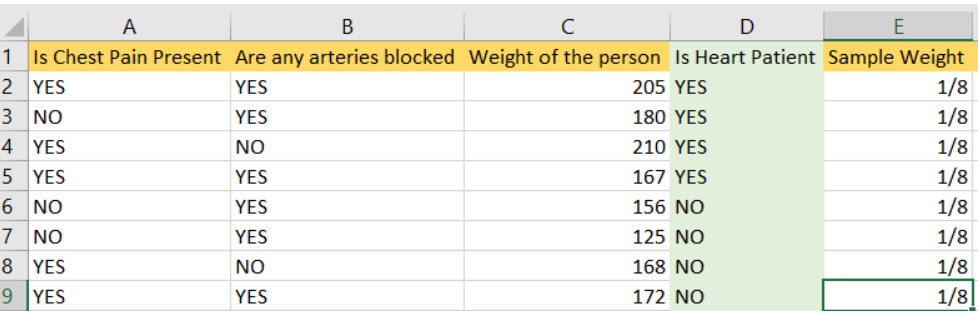

- We’ll consider the individual columns to create weak decision-makers as shown below and then try to figure out what are the correct and incorrect predictions based on that column.

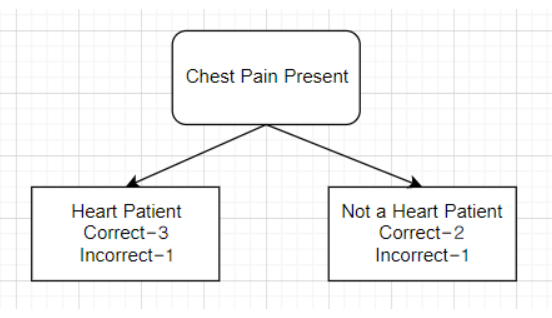

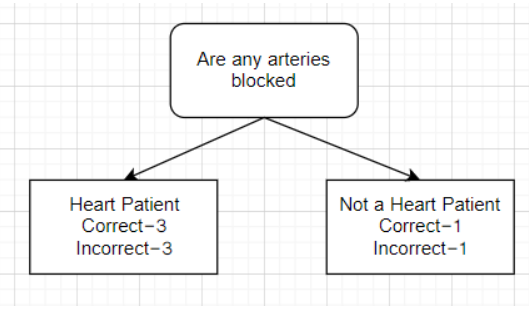

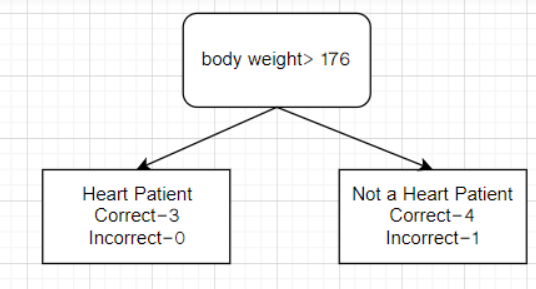

- We’ll now calculate the Gini index of the individual stumps using the formula

     G.I= $\sum (weight of the decision)*(1-(p^2+(1-p)^2))$

        G.I for chest pain tree= 0.47
        G.I for blocked arteries tree= 0.5
        G.I for body-weight tree= 0.2
        
        And, we select the tree with the lowest Gini Index. This will be the first decision-maker for our model.

- Now, we’ll calculate the contribution of this tree(stump) to our final decision using the formula:

Contribution= $½(log (1-total error)/total error)$

    As this stump classified only one data incorrectly out of the 8, hence the total error is 1/8.

    Putting this into the formula we get contribution= 0.97
    
- We’ll now calculate the new weights using the formula:

1. Increase the sample weight for incorrectly classified datapoints
    New weight= old weight*e^ contribution= 1/8* e^0.97=0.33
1. Decrease the sample weight for incorrectly classified datapoints
   New weight= old weight*e^- contribution= 1/8* e^-0.97=0.05

- Populate the new weights as shown below:
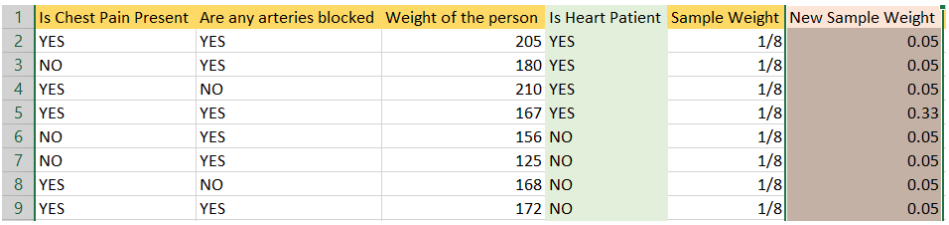

- Normalize the sample weights: If we add all the new sample weights, we get 0.68. Hence, for normalization we divide all the sample weights by 0.68 and then create normalized sample weights as shown below:

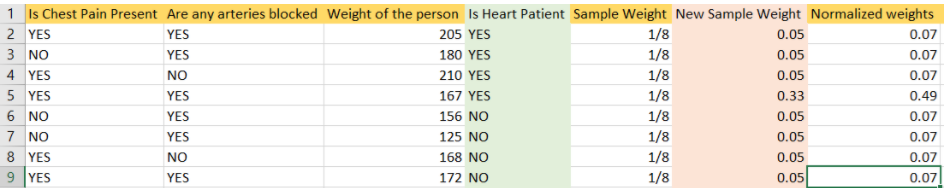

 These new normalized weights will act as the sample weights for the next iteration.

- Then we create new trees which consider the dataset which was prepared using the new sample weights.

- Suppose, m trees(stumps) are classifying a person as a heart patient and n trees(stumps) are classifying a person as a healthy one, then the contribution of m and n trees are added separately and whichever has the higher value, the person is classified as that. 

_For example, if the contribution of m trees is 1.2 and the contribution of n trees is 0.5 then the final result will go in the favour of m trees and the person will be classified as a heart patient._

Let's move to next Boosting Algorithm. 

### Gradient Boosting

Gradient Boosting is similar to AdaBoost in that they both use an ensemble of decision trees to predict a target label. However, unlike AdaBoost, the Gradient Boost trees have a depth larger than 1. Gradient boosting approaches the problem a bit differently. Instead of adjusting weights of data points, Gradient boosting focuses on the difference between the prediction and the ground truth.Gradient boosting requires a differential loss function and works for both regression and classifications. Since this work on differential loss function , it has been given the name __gradient__

**The Algorithm:**

- Calculate the average of the label column as initially this average shall minimise the total error.
- Calculate the pseudo residuals.
       Pseudo residual= actual label- the predicted result (which is average in the first iteration)
  Mathematically,
  
     derivative of the pseudo residual=$(\frac {\delta L(y_i,f(x_i))}{\delta (f(x_i))})$
     
     where, L is the loss function.
                          
               
     Here, the gradient of the error term is getting calculated as the goal is to minimize the error. 
- create a tree to predict the pseudo residuals instead  of a tree to predict for the actual column values.
- new result= previous result+learning rate* residual 
   
   Mathematically, 
     $ F_1(x)= F_0(x)+ \nu \sum \gamma $
     
 where  $ \nu $ is the learning rate and $ \gamma $ is the residual

Repeat these steps until the residual stops decreasing



Let's understand it with an example :

**Example**

Data used the above example can be seen at following location :

https://github.com/abhishek-knowledge-incubator/DataScience/blob/master/Boosting/weights.csv

In [2]:
import pandas as pd
weight_data= pd.read_csv('weights.csv')
weight_data

,Person Height(in metres),Person Favorite Colour,Person Gender,Person Weight (in Kg)
0,1.6,Blue,Male,88
1,1.6,Green,Female,76
2,1.5,Blue,Female,56
3,1.8,Red,Male,73
4,1.5,Green,Male,77
5,1.4,Blue,Female,57


- For the first iteration, calculate the average of the target column(weight here) as it minimizes the residual initially.

Average=(88+76+56+73+77+57)/6=  71.2

- We consider this as the first prediction and then we’ll calculate the residual which is the difference between the predicted and the actual value as shown below:
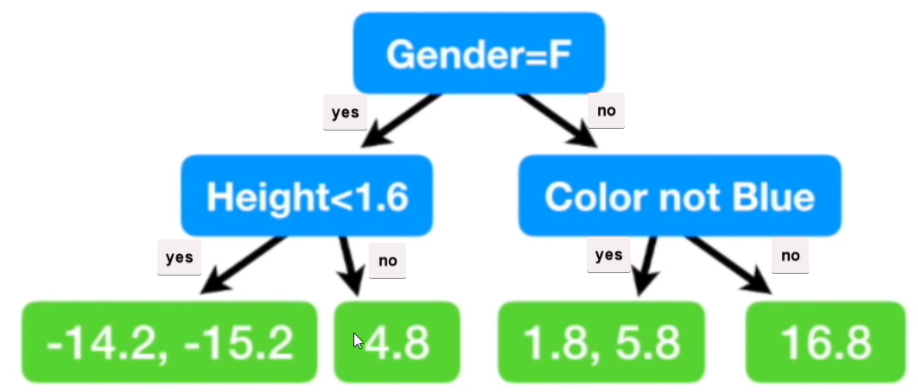

- Now we build a tree to predict the residuals as shown below:

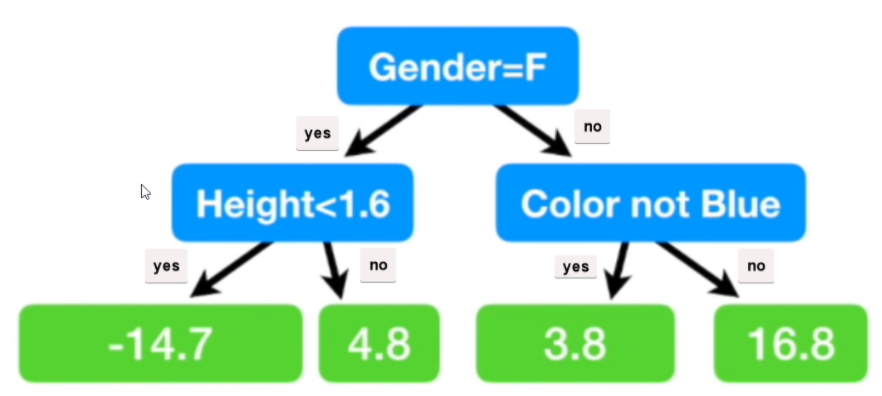

We are only building here till a limited depth just for simplicity. As you can see, some leaves have more than one residuals. For those, we’ll calculate the average and the final tree will look like:

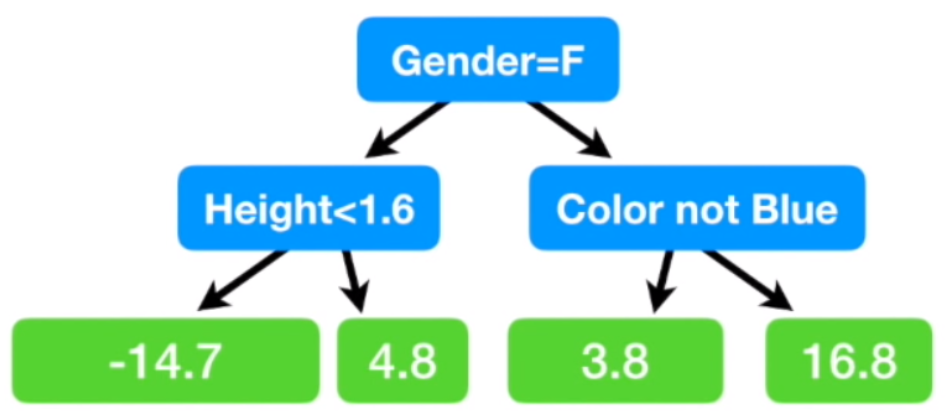

- Now for prediction, we use the formula

                        New value= old value+learning rate * residual
If we consider the learning rate as 0.1, the result becomes.

                        New value=  71.2+0.1*16.8= 72.9 (for the first row).
    Similarly the new predictions for all the rows is calculated.
                        
- The above steps are repeated until there is no significant improvement in residuals.
- The final result is given by
                
                Final Value= First Prediction+learning rate* 1st residual+ learning rate* 2nd residual+ and so on
                
Let's move to last algorithm for this blog i.e. __XGBOOST__

### XGBOOST (Extreme Boosting)

XGBoost improves the gradient boosting method even further. 

It was developed by Tianqi (presented in year 2016) Chen in C++ but now has interfaces for Python, R, Julia.

It is considered to be better than adaboost and Gradient boost.XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

Below diagram show the evolution of XGBOOST:
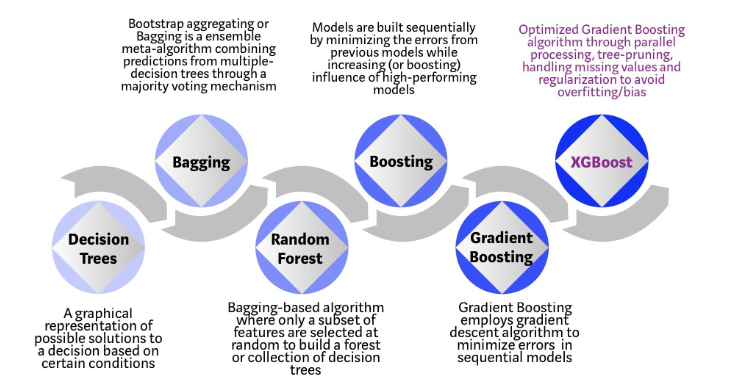

### Why XGBOOST is considered to be perofrming better than adaboost and Gradient Boost??

This is because XGBoost was enahnced with some hardwared optimization and algorithm enhancement. At a glance the improvement that has been done in XGBoost:

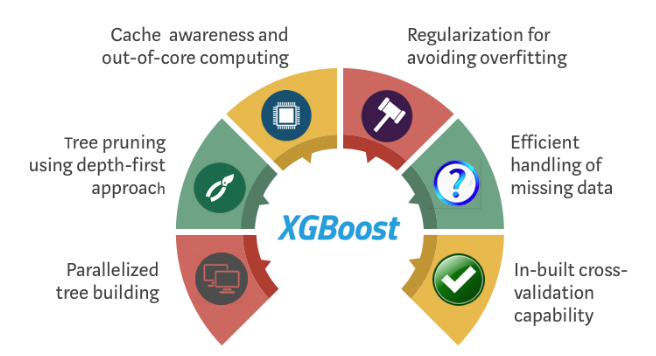

__System Optimization:__

    1. Parallelization:
    XGBoost approaches the process of sequential tree building using parallelized implementation. This is possible due to the interchangeable nature of loops used for building base learners; the outer loop that enumerates the leaf nodes of a tree, and the second inner loop that calculates the features. This nesting of loops limits parallelization because without completing the inner loop (more computationally demanding of the two), the outer loop cannot be started. Therefore, to improve run time, the order of loops is interchanged using initialization through a global scan of all instances and sorting using parallel threads. This switch improves algorithmic performance by offsetting any parallelization overheads in computation.
    
    2.Tree Pruning: 
    The stopping criterion for tree splitting within GBM framework is greedy in nature and depends on the negative loss criterion at the point of split. XGBoost uses ‘max_depth’ parameter as specified instead of criterion first, and starts pruning trees backward. This ‘depth-first’ approach improves computational performance significantly.
    
    3.Hardware Optimization:
    This algorithm has been designed to make efficient use of hardware resources. This is accomplished by cache awareness by allocating internal buffers in each thread to store gradient statistics. Further enhancements such as ‘out-of-core’ computing optimize available disk space while handling big data-frames that do not fit into memory.
    
__Algorithmic Enhancements:__

    1.Regularization: 
    It penalizes more complex models through both LASSO (L1) and Ridge (L2) regularization to prevent overfitting.
    
    2.Sparsity Awareness: 
    XGBoost naturally admits sparse features for inputs by automatically ‘learning’ best missing value depending on training loss and handles different types of sparsity patterns in the data more efficiently.
    
    3. __Weighted Quantile Sketch __: 
    XGBoost employs the distributed weighted Quantile Sketch algorithm to effectively find the optimal split points among weighted datasets.
    
    4.Cross-validation:
    The algorithm comes with built-in cross-validation method at each iteration, taking away the need to explicitly program this search and to specify the exact number of boosting iterations required in a single run.


XGBoost's objective function is the sum of loss function evaluated over all the predictions and a regularisation function for all predictors ($j$ trees). In the formula $f_j$ means a prediction coming from the $j^th$ tree.

$$
obj(\theta) = \sum_{i}^{n} l(y_i - \hat{y_i}) +  \sum_{j=1}^{j} \Omega (f_j)
$$

Loss function depends on the task being performed (classification, regression, etc.) and a regularization term is described by the following equation:

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2
$$

First part ($\gamma T$) is responsible for controlling the overall number of created leaves, and the second term ($\frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2$) watches over the scores.


**Mathematics Involved**
Unlike the other tree-building algorithms, XGBoost doesn’t use entropy or Gini indices. Instead, it utilises gradient (the error term) and hessian for creating the trees. Hessian for a Regression problem is the *number of residuals* and for a classification problem. Mathematically, Hessian is a second order derivative of the loss at the current estimate given as:

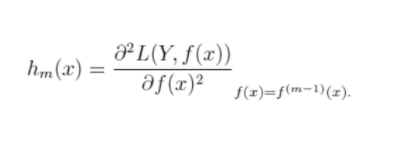

where **L** is the loss function. 

- Initialise the tree with only one leaf.
- compute the similarity using the formula
$$
Similarity= \frac {Gradient^2}{ hessian +\lambda}
$$
Where $\lambda $ is the regularisation term.
- Now for splitting data into a tree form, calculate
$$
Gain=  left similarity+right similarity-similarity for root
$$ 
- For tree pruning, the parameter $ \gamma$ is used. The algorithm starts from the lowest level of the tree and then starts pruning based on the value of $\gamma$.


 If $Gain- \gamma < 0$, remove that branch. Else, keep the branch 
 
- Learning is done using the equation
$$
New Value= old Value+ \eta * prediction
$$

where $\eta$ is the learning rate


Let's see a python implementation of XGBOOST.

#### Problem statement 
The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.
It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:
1.	Number of times pregnant.
2.	Plasma glucose concentration 2 hours in an oral glucose tolerance test.
3.	Diastolic blood pressure (mm Hg).
4.	Triceps skinfold thickness (mm).
5.	2-Hour serum insulin (mu U/ml).
6.	Body mass index (weight in kg/(height in m)^2).
7.	Diabetes pedigree function.
8.	Age (years).
9.	Is Diabetic (0 or 1).

Data can be found at following link :
https://github.com/abhishek-knowledge-incubator/DataScience/blob/master/Boosting/pima-indians-diabetes.csv

#### Solution:


In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [5]:
# reading the features and the labels
data= pd.read_csv('pima-indians-diabetes.csv')

In [6]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Is Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age', 'Is Diabetic'],
      dtype='object')

In [8]:
cols = ['Plasma glucose concentration',
       'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age']

In [9]:
# as mentioned in the data description, the missing values have been replaced by zeroes. So, we are replacing zeroes with nan
for col in cols:
    data[col]=data[col].replace(0, np.nan)

In [10]:
# checking for missing values
data.isna().sum()

Number of times pregnant                            0
Plasma glucose concentration                        5
Diastolic blood pressure (mm Hg)                   35
Triceps skinfold thickness (mm)                   227
2-Hour serum insulin (mu U/ml)                    374
Body mass index (weight in kg/(height in m)^2)     11
Diabetes pedigree function                          0
Age                                                 0
Is Diabetic                                         0
dtype: int64

In [11]:
# imputing the missing values
data['Plasma glucose concentration']=data['Plasma glucose concentration'].fillna(data['Plasma glucose concentration'].mode()[0])
data['Diastolic blood pressure (mm Hg)']=data['Diastolic blood pressure (mm Hg)'].fillna(data['Diastolic blood pressure (mm Hg)'].mode()[0])
data['Triceps skinfold thickness (mm)']=data['Triceps skinfold thickness (mm)'].fillna(data['Triceps skinfold thickness (mm)'].mean())
data['2-Hour serum insulin (mu U/ml)']=data['2-Hour serum insulin (mu U/ml)'].fillna(data['2-Hour serum insulin (mu U/ml)'].mean())
data['Body mass index (weight in kg/(height in m)^2)']=data['Body mass index (weight in kg/(height in m)^2)'].fillna(data['Body mass index (weight in kg/(height in m)^2)'].mean())


In [12]:
# checking for missing values after imputation
data.isna().sum()

Number of times pregnant                          0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skinfold thickness (mm)                   0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age                                               0
Is Diabetic                                       0
dtype: int64

In [13]:
#Separating the feature and the Label columns 
x=data.drop(labels='Is Diabetic', axis=1)
y= data['Is Diabetic']

In [14]:
x.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [41]:
# as the datapoints differ a lot in magnitude, we'll scale them
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [50]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.3,random_state=42)

In [47]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

1.0

In [26]:
# cheking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.7272727272727273

In [27]:
test_x[0]

array([ 0.63994726, -0.77251205, -1.18156252,  0.43784695,  0.40547846,
        0.22451019, -0.1264714 ,  0.83038113])

__Let’s end the blog here. Summary of what we have learned in this blog:__
1.	Boosting concepts 
2.  Adaboost , gradient boost , xgboost 
3.  Python implementation of Xgboost

__Note : More supplimentary blog for the boosting algorithms and its intution and details on its derivation will be dealt in some other blog__

### References: 	
1.	https://www.cellstrat.com/2018/05/05/aibytes-ensemble-learning-techniques/
2.  https://blog.paperspace.com/adaboost-optimizer/
3.  https://towardsdatascience.com/boosting-algorithms-explained-d38f56ef3f30
4.  https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d


### Additional Reads:
1. Gradient boosting for classificaiton http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf
2. XGBoost : https://www.youtube.com/watch?v=OtD8wVaFm6E



### Follow my blog: https://datasciencewithabhi.blogspot.com/
